In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as  np
from scipy import fft

In [69]:
csv_file = pd.read_csv('data2.csv')
N = int(csv_file.shape[0])
Fs = 100
frequencies_hz = np.fft.fftfreq(N, 1/Fs)[:N//2 + 1]

emg = csv_file.iloc[:, 1]
frequencies_hz.size

2501

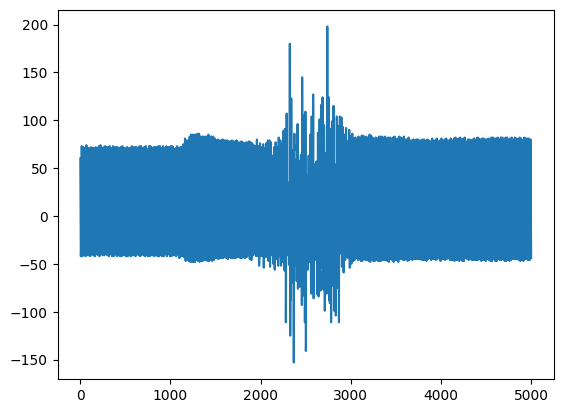

In [66]:
plt.plot(emg)

<StemContainer object of 3 artists>

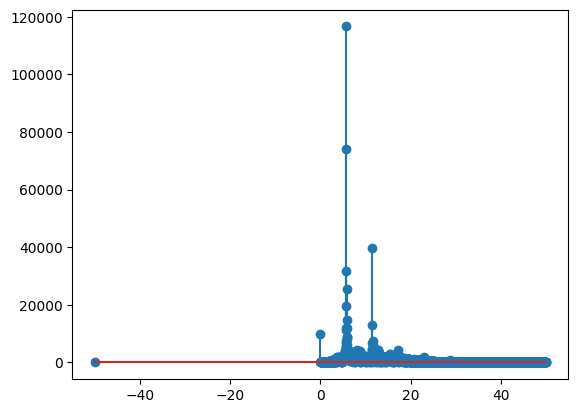

In [71]:
X = abs(fft.fft(emg))[0:int(N/2) + 1]

plt.stem(frequencies_hz, X)